In [1]:
import numpy as np
import pandas as pd

In [2]:
sms = pd.read_csv('sms_spam_collection.csv')

In [3]:
sms.head()

,Unnamed: 0,label,message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms['label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

## Text Preprocessing

Method :
1. converting to lower case
1. contraction
1. remove or convert number into text
1. remove punctuation
1. remove white spaces
1. remove stopwords and particular words

### 1. Converting to lower case

In [5]:
def to_lower(text):
    return text.lower()

In [6]:
text_1 = 'Summer December 10th 2019'
to_lower(text_1)

'summer december 10th 2019'

### 2. Contraction

In [7]:
import re

In [8]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [9]:
text_2 = "If I ain't got you"
main_contraction(text_2)

'If I am not got you'

### 3. Remove or convert Number Into Text

In [10]:
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [11]:
text_3 = 'I was born in 1991'
remove_numbers(text_3)

'I was born in '

### 4. Remove punctuation

In [12]:
from string import punctuation

In [13]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuation(text):
    return ''.join(c for c in text if c not in punctuation)

In [15]:
text_4 = 'There was Bobby, Alex, Fergie and I'
remove_punctuation(text_4)

'There was Bobby Alex Fergie and I'

### 5. Remove white space

In [16]:
def to_strip(text):
    return " ".join(text.split())

In [17]:
text_5 = "There    was     bobby, alex, fergie and I      "
to_strip(text_5)

'There was bobby, alex, fergie and I'

### 6. Remove Stopwords

In [18]:
import nltk
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\R7891\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\R7891\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
print(stopwords.words('english')) # kao indonesia pake 'indonesian'

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [22]:
text_6 = 'There was bobby, alex, fergie and I'
remove_stopwords(text_6)

'There bobby , alex , fergie I'

## Combine all function

In [23]:
def text_preprocessing(sentence):
    prep1 = to_lower(sentence)
    prep2 = main_contraction(prep1)
    prep3 = remove_numbers(prep2)
    prep4 = remove_punctuation(prep3)
    prep5 = to_strip(prep4)
    prep6 = remove_stopwords(prep5)
    
    return prep6

In [24]:
text_7 = 'There was bobby, alex, fergie and I'
text_preprocessing(text_7)

'bobby alex fergie'

In [25]:
sms.head(1)

,Unnamed: 0,label,message
0,0,ham,"Go until jurong point, crazy.. Available only ..."


In [26]:
sms['message_clean'] = sms['message'].apply(text_preprocessing)
sms[['message', 'message_clean']]

,message,message_clean
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u £ pound prize claim ...
5568,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5569,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


## Text Preprocessing 2

## Stemming
The process of transforming to the root word.
For example you have caring, cares, cared, caringly carefully then you want to consider them as the same words “care”.
We need stemming because treating them as the same words will reduce overfitting.

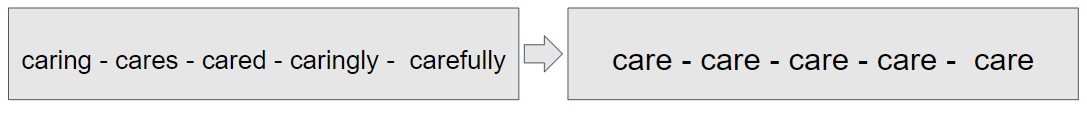

In [27]:
from nltk.stem import SnowballStemmer
from tqdm import tqdm

In [40]:
snowball_stemmer = SnowballStemmer('english')

def stem(text):
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)

In [29]:
text_8 = "I am reading a book and the book is very fascinating"
stem(text_8)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 80.07it/s]


'i am read a book and the book is veri fascin'

In [30]:
stem('carefully')

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 77.16it/s]


'care'

## Lemmatization

The process of transforming to the dictionary base form.
caring, cares, cared, caringly carefully will be transformed into care, care, care caringly carefully.
caringly and carefully are listed in the dictionary.
purpose of lemmatization is also to reduce overfitting.

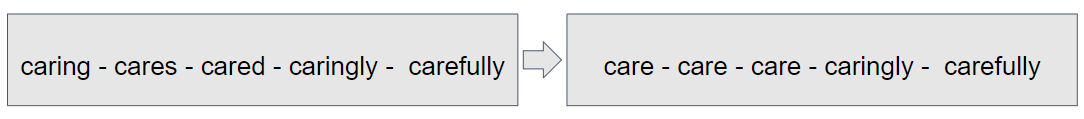

In [31]:
from nltk.stem import WordNetLemmatizer

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\R7891\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
wordnet_lemma = WordNetLemmatizer()

In [39]:
def lemmatize(text):
    lemma_word = [wordnet_lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(lemma_word)

In [35]:
lemmatize(text_8)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.28s/it]


'I am reading a book and the book is very fascinating'

In [36]:
lemmatize('there she goes. Here I am')

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4008.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 62.67it/s]


'there she go . Here I am'

In [37]:
for i in tqdm(range(1,6)):
    print(i)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

1
2
3
4
5


In [41]:
sms['message_stem'] = sms['message_clean'].apply(stem)
sms['message_lemma'] = sms['message_clean'].apply(lemmatize)

sms[['message_stem', 'message_lemma']]

,message_stem,message_lemma
0,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ok lar joke wif u oni,ok lar joking wif u oni
2,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,nah think goe usf live around though,nah think go usf life around though
...,...,...
5567,nd time tri contact u u £ pound prize claim ea...,nd time tried contact u u £ pound prize claim ...
5568,ü b go esplanad fr home,ü b going esplanade fr home
5569,piti mood soani suggest,pity mood soany suggestion
5570,guy bitch act like interest buy someth els nex...,guy bitching acted like interested buying some...


## Text Exploration

### Word Freq

In [42]:
import seaborn as sns

In [57]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    
    return kamus

In [53]:
check = pd.Series(['there she goes, here i am', 'there she goes, here i go'])

check = check.str.extractall('([a-zA_Z]+)')
check.columns = ['check']
b = check.reset_index(drop=True)
check = b['check'].value_counts()
check
# b

kamus = {'kata':check.index,'freq':check.values}
kamus = pd.DataFrame(kamus)
kamus.index = kamus['kata']
kamus.drop('kata', axis = 1, inplace = True)
kamus.sort_values('freq',ascending=False,inplace=True)

kamus

,freq
kata,
she,2
i,2
here,2
there,2
goes,2
go,1
am,1


In [55]:
sms

,Unnamed: 0,label,message,message_clean,message_stem,message_lemma
0,0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though
...,...,...,...,...,...,...
5567,5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u £ pound prize claim ...,nd time tri contact u u £ pound prize claim ea...,nd time tried contact u u £ pound prize claim ...
5568,5568,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home,ü b go esplanad fr home,ü b going esplanade fr home
5569,5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions,piti mood soani suggest,pity mood soany suggestion
5570,5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,guy bitch act like interest buy someth els nex...,guy bitching acted like interested buying some...


In [56]:
sms['message_lemma']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    nd time tried contact u u £ pound prize claim ...
5568                          ü b going esplanade fr home
5569                           pity mood soany suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message_lemma, Length: 5572, dtype: object

In [62]:
kamus_clean = kamus(sms[sms['label']=='spam']['message_lemma'])

<AxesSubplot:ylabel='kata'>

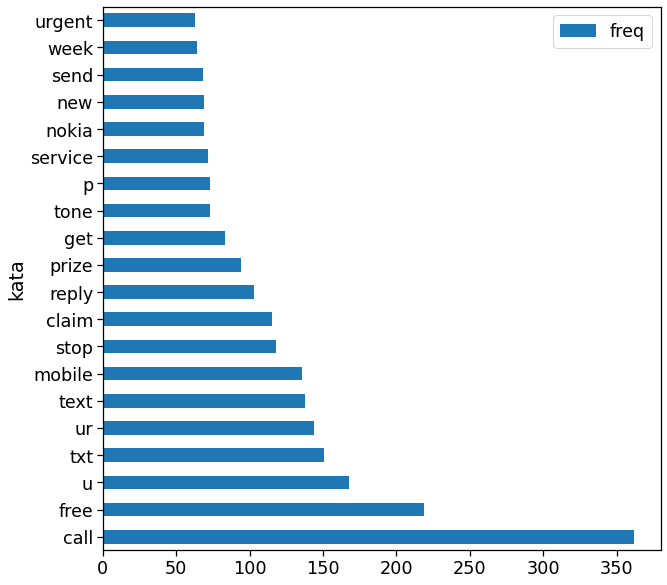

In [63]:
sns.set_context(context = 'notebook', font_scale=1.6)
kamus_clean[:20].plot(kind='barh', figsize=(10,10))

## Word Cloud

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [67]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis('off')

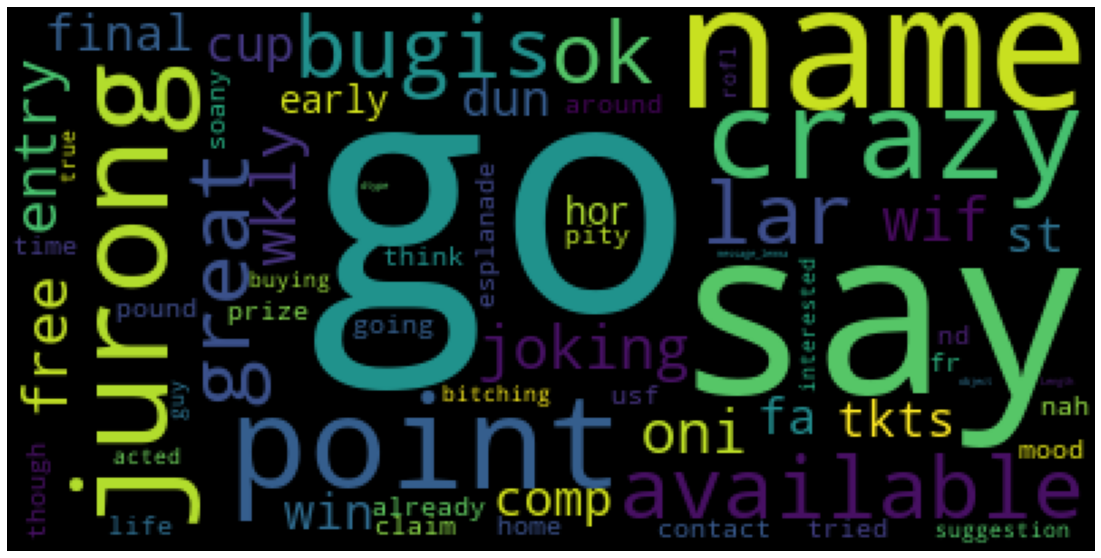

In [68]:
word_cloud = WordCloud().generate(str(sms['message_lemma']))
plot_cloud(word_cloud)

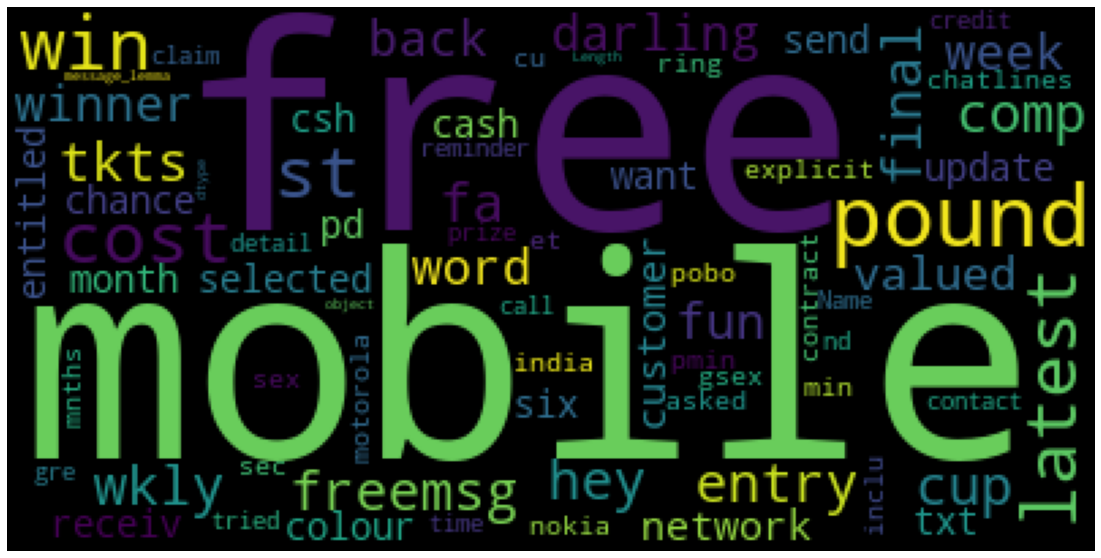

In [70]:
word_cloud_spam = WordCloud().generate(str(sms[sms['label']=='spam']['message_lemma']))
plot_cloud(word_cloud_spam)

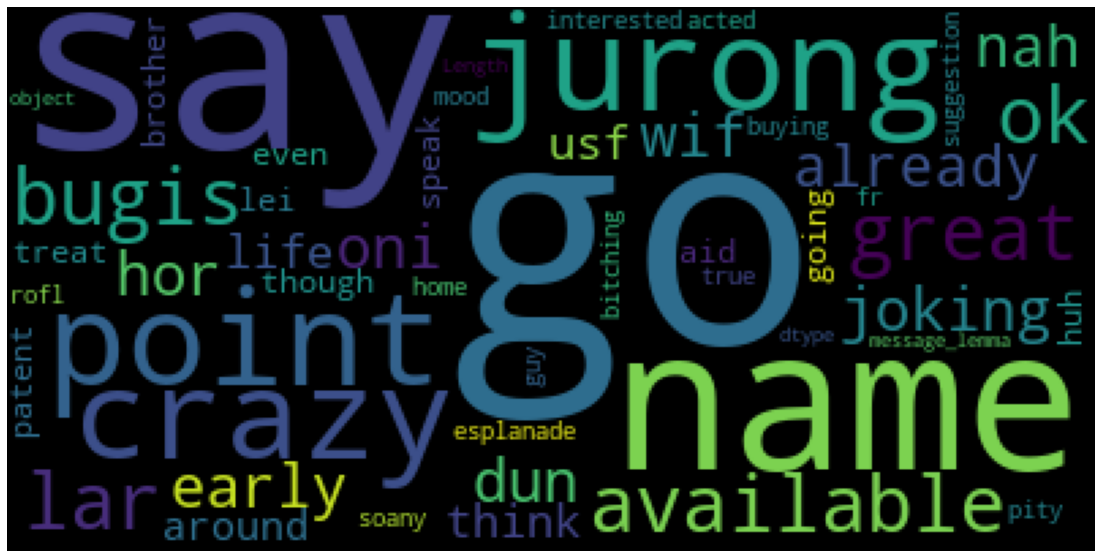

In [71]:
word_cloud_ham = WordCloud().generate(str(sms[sms['label']=='ham']['message_lemma']))
plot_cloud(word_cloud_ham)

## Length of Sentence

In [72]:
sms['length'] = sms['message'].apply(len)

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


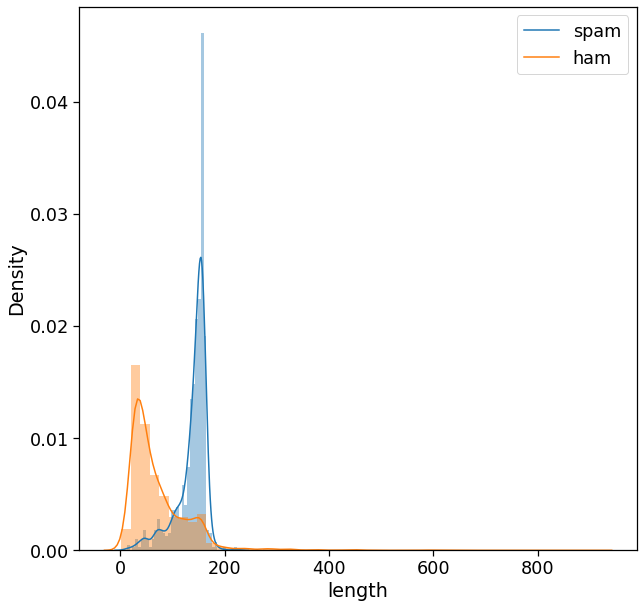

In [73]:
plt.figure(figsize=(10,10))

sms_spam = sms[sms['label']=='spam']
sms_ham = sms[sms['label']=='ham']

sns.distplot(sms_spam['length'])
sns.distplot(sms_ham['length'])

plt.legend(['spam', 'ham'])

plt.show()

In [77]:
sms_ham[sms_ham['length'] == sms_ham['length'].max()]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


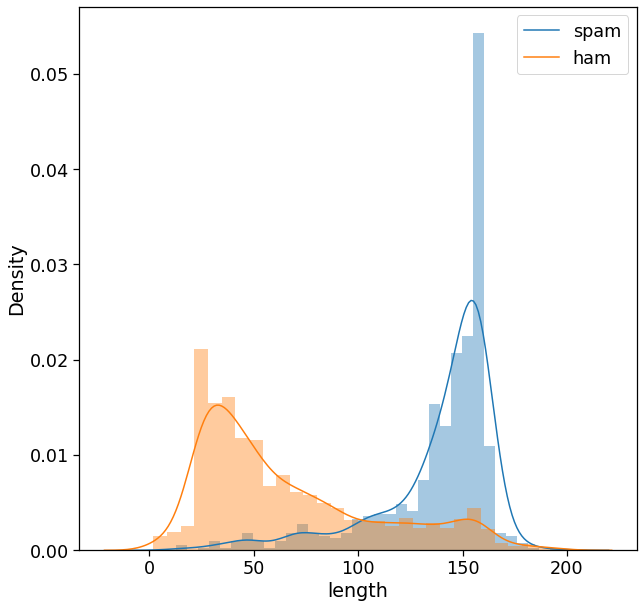

In [78]:
plt.figure(figsize = (10,10))

sms2 = sms[sms['length'] < 200] 
sms2_spam = sms2[sms2['label'] == 'spam']
sms2_ham = sms2[sms2['label'] == 'ham']

sns.distplot(sms2_spam['length'])
sns.distplot(sms2_ham['length'])

plt.legend(['spam','ham'])

plt.show()

## Document Term Matrix

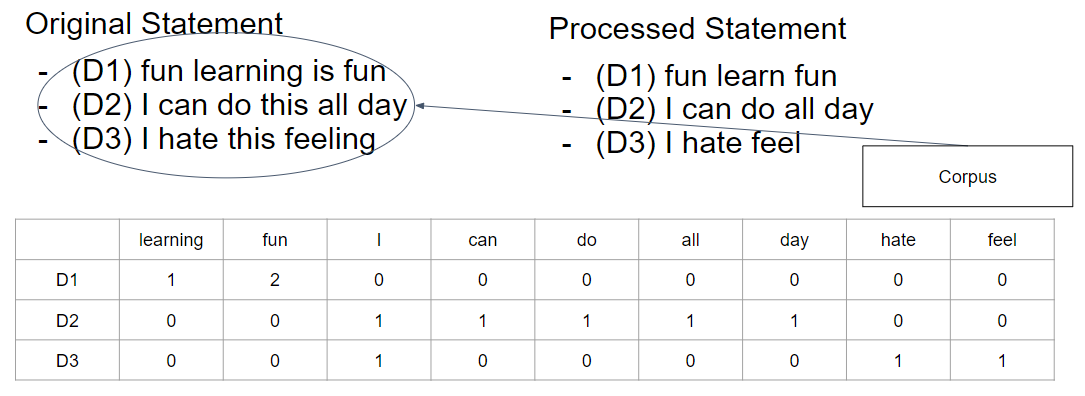

In [79]:
words_example = ["You already know me, don't you?",
                 "I am the best there is"]

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

In [117]:
vect = CountVectorizer()
vect.fit(words_example)

CountVectorizer()

In [118]:
print('Vocab size: {}'.format(len(vect.vocabulary_)))
print('Vocab content: {}'.format(vect.vocabulary_))

Vocab size: 10
Vocab content: {'you': 9, 'already': 0, 'know': 5, 'me': 6, 'don': 3, 'am': 1, 'the': 7, 'best': 2, 'there': 8, 'is': 4}


In [119]:
dtm = vect.transform(words_example)

In [120]:
dtm.toarray()

array([[1, 0, 0, 1, 0, 1, 1, 0, 0, 2],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]], dtype=int64)

In [121]:
vect.get_feature_names()

['already', 'am', 'best', 'don', 'is', 'know', 'me', 'the', 'there', 'you']

In [122]:
dtm = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
dtm['text'] = words_example
dtm

,already,am,best,don,is,know,me,the,there,you,text
0,1,0,0,1,0,1,1,0,0,2,"You already know me, don't you?"
1,0,1,1,0,1,0,0,1,1,0,I am the best there is


## N-Grams

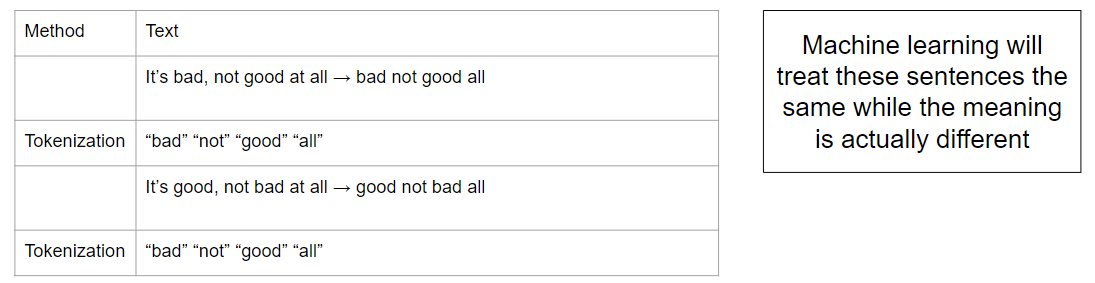

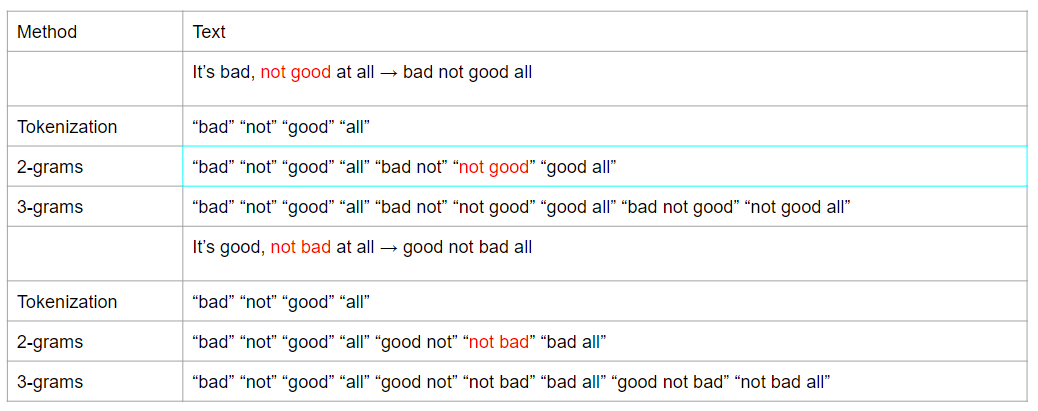

In [97]:
words_example

["You already know me, don't you?", 'I am the best there is']

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
vect2 = CountVectorizer(ngram_range=(1,2))
vect2.fit(words_example)

CountVectorizer(ngram_range=(1, 2))

In [108]:
print("vocabulary size:", len(vect2.vocabulary_))
print("vocabulary content:\n", vect2.vocabulary_)

vocabulary size: 19
vocabulary content:
 {'you': 17, 'already': 0, 'know': 9, 'me': 11, 'don': 6, 'you already': 18, 'already know': 1, 'know me': 10, 'me don': 12, 'don you': 7, 'am': 2, 'the': 13, 'best': 4, 'there': 15, 'is': 8, 'am the': 3, 'the best': 14, 'best there': 5, 'there is': 16}


In [111]:
dtm = vect2.transform(words_example)

In [113]:
dtm.toarray()

array([[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]],
      dtype=int64)

In [114]:
vect2.get_feature_names()

['already',
 'already know',
 'am',
 'am the',
 'best',
 'best there',
 'don',
 'don you',
 'is',
 'know',
 'know me',
 'me',
 'me don',
 'the',
 'the best',
 'there',
 'there is',
 'you',
 'you already']

In [115]:
dtm = pd.DataFrame(dtm.toarray(), columns=vect2.get_feature_names())
dtm

,already,already know,am,am the,best,best there,don,don you,is,know,know me,me,me don,the,the best,there,there is,you,you already
0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,2,1
1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0


In [116]:
dtm['message'] = words_example
dtm

,already,already know,am,am the,best,best there,don,don you,is,know,know me,me,me don,the,the best,there,there is,you,you already,message
0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,2,1,"You already know me, don't you?"
1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,I am the best there is


## TF-IDF

rescale features by how informative we expect them to be.
give high weight to any term appear often in particular document, not in many documents.
tfidf(word, doc) = tf(word) log((N+1)/(Nw+1)) + 1, with 
- tf(word, doc) : term freq of certain word of document
- Nw : number of doc where the words appear
- N : number of doc in training set


TF-IDF Calculation
<br>
tfidf(word, doc) = tf(word,doc) log((N+1)/(Nw+1)) + 1, with
- tfidf for word learning and document D1
- N = 3, Nw = 1, tf(learning,D1) = 1
- tfidf(learning, D1) =  1 log(4/2) + 1 = 1.693	


Original Statement
- (D1) fun learning is fun
- (D2) I can do this all day
- (D3) I hate this feeling


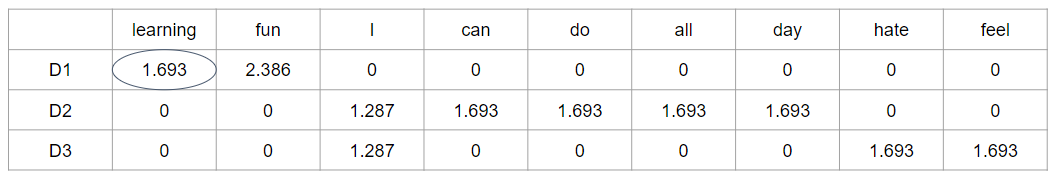

In [123]:
words_example

["You already know me, don't you?", 'I am the best there is']

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
vect = TfidfVectorizer()
vect.fit(words_example)

TfidfVectorizer()

In [126]:
print('vocabulary size:', len(vect.vocabulary_))
print('vocabulary content:', vect.vocabulary_)

vocabulary size: 10
vocabulary content: {'you': 9, 'already': 0, 'know': 5, 'me': 6, 'don': 3, 'am': 1, 'the': 7, 'best': 2, 'there': 8, 'is': 4}


In [127]:
dtm_tf_idf = vect.transform(words_example)

In [128]:
dtm_tf_idf.toarray()

array([[0.35355339, 0.        , 0.        , 0.35355339, 0.        ,
        0.35355339, 0.35355339, 0.        , 0.        , 0.70710678],
       [0.        , 0.4472136 , 0.4472136 , 0.        , 0.4472136 ,
        0.        , 0.        , 0.4472136 , 0.4472136 , 0.        ]])

In [129]:
vect.get_feature_names()

['already', 'am', 'best', 'don', 'is', 'know', 'me', 'the', 'there', 'you']

In [130]:
dtm_tf_idf = pd.DataFrame(dtm_tf_idf.toarray(), columns = vect.get_feature_names())

In [132]:
dtm_tf_idf

,already,am,best,don,is,know,me,the,there,you
0,0.353553,0.000000,0.000000,0.353553,0.000000,0.353553,0.353553,0.000000,0.000000,0.707107
1,0.000000,0.447214,0.447214,0.000000,0.447214,0.000000,0.000000,0.447214,0.447214,0.000000


## Spam Detector

### Data Splitting

In [133]:
from sklearn.model_selection import train_test_split

In [135]:
text = sms['message_lemma']
y = np.where(sms['label']=='spam',1,0)

In [136]:
text_train, text_test, y_train, y_test = train_test_split(text, y)

### fit and transform method

In [137]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [140]:
len(vect.vocabulary_)

6828

In [138]:
X_train

<4179x6828 sparse matrix of type '<class 'numpy.int64'>'
	with 33316 stored elements in Compressed Sparse Row format>

In [141]:
X_test

<1393x6828 sparse matrix of type '<class 'numpy.int64'>'
	with 9747 stored elements in Compressed Sparse Row format>

In [145]:
vect.get_feature_names()[:10]

['aa',
 'aah',
 'aaniye',
 'aathilove',
 'aathiwhere',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abelu']

In [146]:
vect.get_feature_names()[-10:]

['zero',
 'zhong',
 'zindgi',
 'zoe',
 'zogtorius',
 'zoom',
 'zouk',
 'zyada',
 'üll',
 '〨ud']

## Text Classification

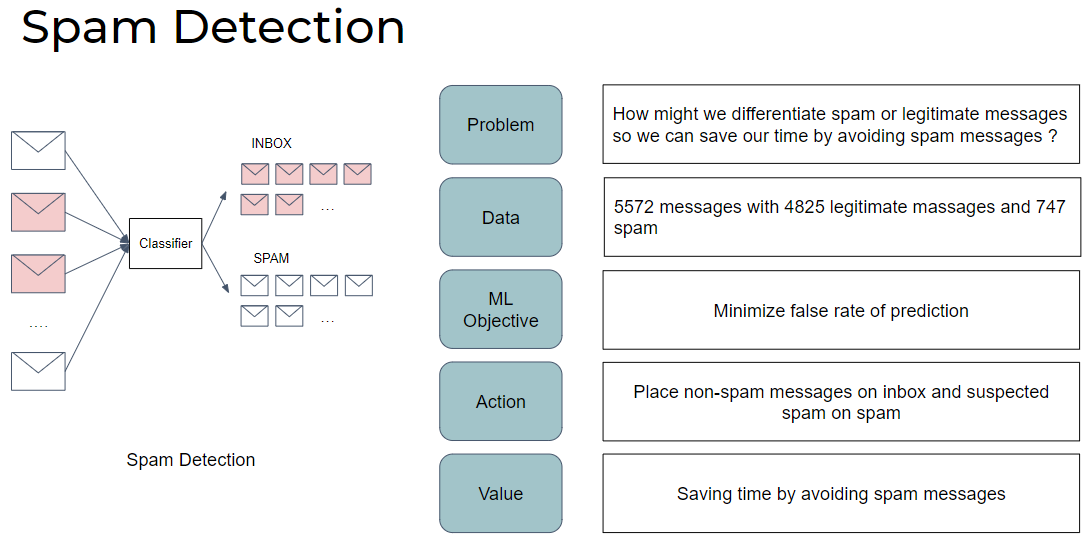

You can use some algo you already learned
- Logistic Regression
- RF
- Boosting, etc

<br>

There are another method such as
- Naive Bayes
- Support Vector Classifier (SVC)
- Deep Learning


In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [148]:
model = LogisticRegression()

In [149]:
model.fit(X_train, y_train)

LogisticRegression()

In [150]:
y_pred = model.predict(X_test)

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1204
           1       0.99      0.84      0.91       189

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [153]:
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

MultinomialNB()

In [154]:
y_pred_nb = model_nb.predict(X_test)

In [155]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1204
           1       0.95      0.91      0.93       189

    accuracy                           0.98      1393
   macro avg       0.97      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



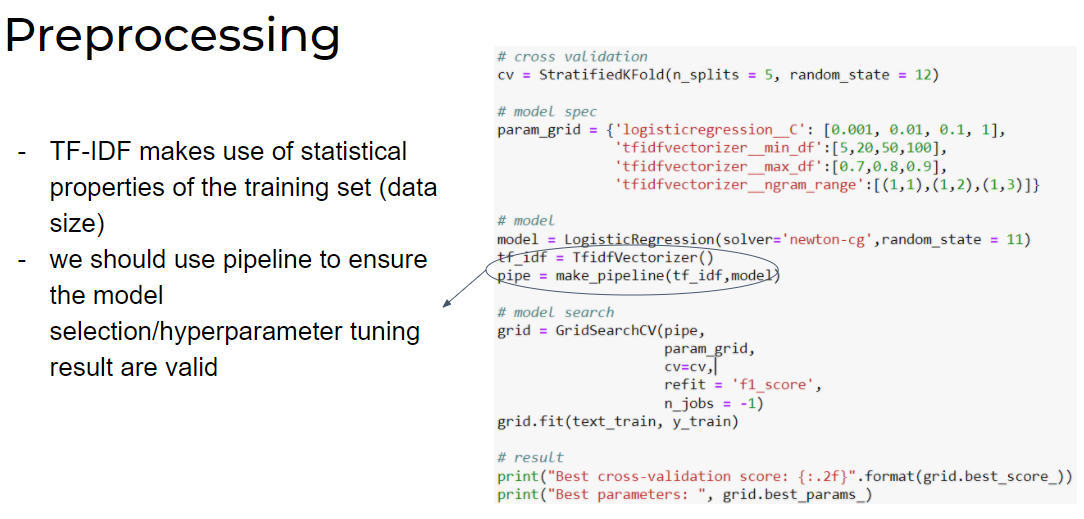

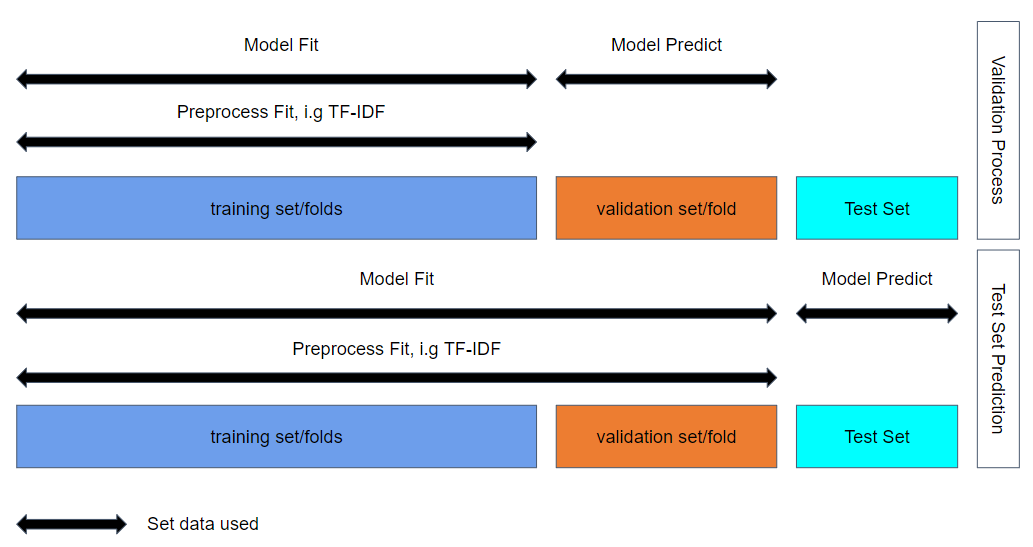

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [159]:
tf_idf_prep = TfidfVectorizer()
model = MultinomialNB()
pipe = Pipeline([
    ('preprocess', tf_idf_prep),
    ('imputer', SimpleImputer())
    ('model', MultinomialNB())
])

param_grid = {
    'model__alpha': np.linspace(0, 1, 10)
    'imputer__strategy': ['mean', 'median']
}

grid = GridSearchCV(pipe, param_grid, cv = 5)

In [161]:
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])})

In [162]:
grid.fit(text_train, y_train)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])})

In [163]:
grid.best_estimator_

Pipeline(steps=[('preprocess', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=0.1111111111111111))])

In [164]:
grid.best_score_

0.9791814457209982

In [165]:
nb_tuned = grid.best_estimator_.fit(text_train, y_train)
y_pred_nb_tuned = nb_tuned.predict(text_test)

In [171]:
nb_tuned.predict_proba(text_test)

array([[9.90279254e-01, 9.72074564e-03],
       [9.99195430e-01, 8.04569948e-04],
       [9.92419123e-01, 7.58087735e-03],
       ...,
       [9.91016722e-01, 8.98327848e-03],
       [2.54763327e-03, 9.97452367e-01],
       [9.47441512e-01, 5.25584882e-02]])

In [166]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1204
           1       0.95      0.91      0.93       189

    accuracy                           0.98      1393
   macro avg       0.97      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [168]:
from sklearn.metrics import confusion_matrix

In [169]:
confusion_matrix(y_test, y_pred_nb)

array([[1195,    9],
       [  17,  172]], dtype=int64)

In [167]:
print(classification_report(y_test, y_pred_nb_tuned))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1204
           1       0.97      0.89      0.93       189

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [170]:
confusion_matrix(y_test, y_pred_nb_tuned)

array([[1199,    5],
       [  21,  168]], dtype=int64)